In [31]:
%matplotlib inline
import numpy as np

data2=np.loadtxt('D:/number_recognizer/test.txt')
target2=np.loadtxt('D:/number_recognizer/target.txt')

print(data2.shape)
print(target2.shape)

(889L, 64L)
(889L,)


In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

from sklearn import datasets, svm, metrics

target2 = target2.astype(int)
#data = digits.images.reshape((n_samples, -1))
data = data2
#data = data2[:,np.nonzero(rfe.ranking_ < 10)[0]]
n_samples = len(target2)


#classifier = SGDClassifier(alpha=0.0001, fit_intercept=True, n_iter=200)
classifier = svm.SVC(gamma=0.0013)


#classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])
classifier.fit(data[:n_samples / 2], target2[:n_samples / 2])



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0013, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

Optimal number of features : 30


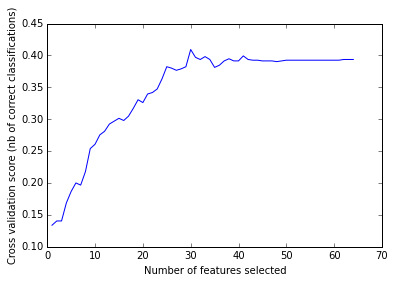

In [33]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X = data2
y = target2

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



In [28]:
expected = target2[n_samples / 2:]
predicted = rfecv.predict(data2[n_samples / 2:])


print("Classification report for classifier %s:\n%s\n"
    % (rfecv, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))

Classification report for classifier RFECV(cv=sklearn.cross_validation.StratifiedKFold(labels=[ 3.  5. ...,  9.  0.], n_folds=2, shuffle=False, random_state=None),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
   estimator_params=None, scoring='accuracy', step=1, verbose=0):
             precision    recall  f1-score   support

          0       0.70      0.71      0.71        49
          1       0.57      0.89      0.69        28
          2       0.71      0.67      0.69        48
          3       0.52      0.68      0.59        50
          4       0.76      0.72      0.74        43
          5       0.55      0.44      0.49        41
          6       0.71      0.56      0.63        39
          7       0.84      0.72      0.77        43
          8       0.81      0.70      0.75        50
          9       0.71      0.73 

In [29]:
from sklearn.externals import joblib

joblib.dump(classifier, "./machine3.pkl") 

['./machine3.pkl',
 './machine3.pkl_01.npy',
 './machine3.pkl_02.npy',
 './machine3.pkl_03.npy',
 './machine3.pkl_04.npy',
 './machine3.pkl_05.npy',
 './machine3.pkl_06.npy',
 './machine3.pkl_07.npy',
 './machine3.pkl_08.npy',
 './machine3.pkl_09.npy',
 './machine3.pkl_10.npy',
 './machine3.pkl_11.npy']